# Rolling Statistics

In [1]:
# global statistics

                   SPY        AAPL        MFT        TSLA
2020-01-30  324.337128  321.650970  13.598270  640.809998
2020-01-31  318.447845  307.389374  13.627554  650.570007
2020-02-03  320.813446  306.545197  13.637316  780.000000
2020-02-04  325.703064  316.665344  13.656839  887.059998
2020-02-05  329.464294  319.247589  13.715412  734.700012
2020-02-06  330.572876  322.981781  13.764220  748.960022
2020-02-07  328.811035  318.591583  13.744698  748.070007
2020-02-10  331.265717  320.104767  13.891124  771.280029
2020-02-11  331.839813  318.173462  13.959457  774.380005
2020-02-12  333.977783  325.729401  13.998506  767.289978


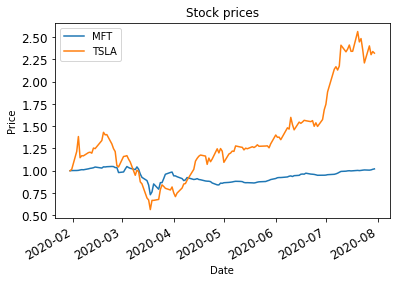

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def symbol_to_path(symbol, base_dir = "Data"):
    """Return CSV path with given ticker symbol"""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))
def get_data(symbols, dates):
    df = pd.DataFrame(index=dates)
    """Read stock data (adjusted close) for given symbols from CSV files."""
    if 'SPY' not in symbols:
        """add SPY for reference"""
        symbols.insert(0, 'SPY') 
        
    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col = "Date", 
                          parse_dates = True, usecols = ['Date', 'Adj Close'], na_values = ['nan'])
        df_temp.rename(columns={'Adj Close': symbol}, inplace=True)
        """column name must be unique"""
        df = df.join(df_temp)
        df = df.dropna()
    
    return df

def plot_data(df, title="Stock prices"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()
    
    
def test_run():
    # Define a date range
    sd,ed = '2020-01-30', '2020-07-30'
    dates = pd.date_range('2020-01-30', '2020-07-30')

    # Choose stock symbols to read
    symbols = ['AAPL', 'MFT', 'TSLA', 'GOOG']
    
    # Get stock data
    df = get_data(symbols, dates)
    print(df.head(10))
    
    # Slice and plot
    plot_selected(df, ['MFT', 'TSLA'], sd,ed)
    
def plot_selected(df, columns, start_index, end_index):
    """Plot the desired columns over index values in the given range."""
    df = normalize_data(df)
    plot_data(df.loc[start_index:end_index, columns])

def normalize_data(df):
    """Normalize stock prices using the first row of the dataframe."""
    return df / df.iloc[0, :]

if __name__ == "__main__":
    test_run()